In [1]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Config
sns.set(color_codes=True)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
from useful_functions import *

## Score constituencies

In [3]:
ge10, ge15, ge17 = read_in_election_results() 

In [4]:
diff_17 = score_campaigns_difference(ge17, ge15)
uns_17 = score_campaigns_uns(ge17, ge15)
mrp_17 = score_campaigns_mrp(ge17)

In [5]:
incumbent = ge15.index[ ge15['winner'] == 'lab' ]
challenge = ge15.index[ ge15['winner'] != 'lab' ]

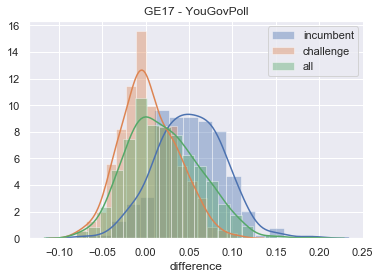

In [6]:
ax = sns.distplot(mrp_17.loc[incumbent,'difference'].dropna(),label='incumbent').set_title('GE17 - YouGovPoll')
ax = sns.distplot(mrp_17.loc[challenge,'difference'].dropna(),label='challenge')
ax = sns.distplot(mrp_17['difference'].dropna(),label='all')

plt.legend()

In [7]:
print(np.mean(mrp_17.loc[incumbent,'difference'].dropna()))
print(np.mean(mrp_17.loc[challenge,'difference'].dropna()))
print(np.mean(mrp_17['difference'].dropna()))

0.050815658544459505
0.0037732068838266884
0.02106932223290246


In [8]:
print(np.mean(uns_17.loc[incumbent,'difference'].dropna()))
print(np.mean(uns_17.loc[challenge,'difference'].dropna()))
print(np.mean(uns_17['difference'].dropna()))

0.011006605156311897
-0.010523439589858663
-0.002607480190315762


232

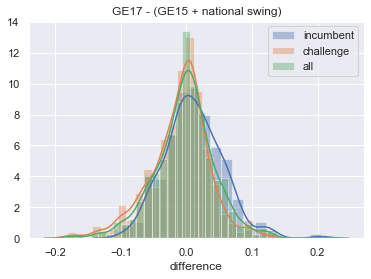

In [9]:
ax = sns.distplot(uns_17.loc[incumbent,'difference'].dropna(),label='incumbent').set_title('GE17 - (GE15 + national swing)')
ax = sns.distplot(uns_17.loc[challenge,'difference'].dropna(),label='challenge')
ax = sns.distplot(uns_17['difference'].dropna(),label='all')

plt.legend()
len(incumbent)

In [11]:
ge17.head()

,PANO,Constituency,Surname,First name,Party,Party Identifer,Valid votes,Election Year,total_votes,ukip,ukip_pc,ld,ld_pc,lab,lab_pc,con,con_pc,snp,snp_pc,grn,grn_pc
ons_id,,,,,,,,,,,,,,,,,,,,,
E14000530,7,Aldershot,PUFFETT,Gary John,Labour Party,Labour,15477,2017,48950,1796.0,0.036691,3637.0,0.074300,15477.0,0.316180,26950.0,0.550562,0.0,0.0,1090.0,0.022268
E14000531,8,Aldridge-Brownhills,FISHER,John Gary,Labour Party,Labour,12010,2017,40235,0.0,0.000000,1343.0,0.033379,12010.0,0.298496,26317.0,0.654082,0.0,0.0,0.0,0.000000
E14000532,9,Altrincham and Sale West,WESTERN,Andrew,Labour Party,Labour,20507,2017,52790,0.0,0.000000,4051.0,0.076738,20507.0,0.388464,26933.0,0.510191,0.0,0.0,1000.0,0.018943
E14000533,11,Amber Valley,DAWSON,James Clifford Hedley,Labour Party,Labour,17605,2017,45811,0.0,0.000000,1100.0,0.024012,17605.0,0.384296,25905.0,0.565476,0.0,0.0,650.0,0.014189
E14000534,18,Arundel and South Downs,FIFE,Caroline Joan,Labour Party,Labour,13690,2017,60256,1668.0,0.027682,4783.0,0.079378,13690.0,0.227197,37573.0,0.623556,0.0,0.0,2542.0,0.042187


In [118]:
ge19 = pd.read_csv('ge2019.csv',encoding = "ISO-8859-1")

ge19 = ge19.rename({"ONSConstID": "ons_id"}, axis=1)
ge19 = ge19.dropna(subset=['ons_id'])
ge19.index = ge19['ons_id']

parties = {"con":"CON",
           "lab":"LAB",
           "ld":"LIBDEM",
           "grn":"GRN",
           "snp":"SNP",
           "pc":"PC",
           "ukip":"UKIP",
           "bxp":"BXP",
           "other":"OTHER"}
    
for party in parties:
    ge19 = ge19.rename({parties[party]:party},axis=1)
    ge19[party] = ge19[party].astype(str)
    ge19[party] = ge19[party].str.replace(',', '')
    ge19[party] = ge19[party].astype(float)

ge19['total'] = ge19.fillna(0)[parties].sum(1)

for party in parties:
    ge19[party+'_pc'] = ge19[party] / ge19['total']
    
ge19['winner'] = ge19[parties.keys()].T.apply(lambda x: x.nlargest(1).idxmin() )
ge19

,Constituency,PANO,ons_id,Constituency.1,Region,Estimated declaration time,Day,Day/Time,con,lab,ld,grn,snp,pc,bxp,ukip,other,Registered Voters,Turnout,total,con_pc,lab_pc,ld_pc,grn_pc,snp_pc,pc_pc,ukip_pc,bxp_pc,other_pc,winner
ons_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
E14000754,Houghton & Sunderland South,320.0,E14000754,Houghton & Sunderland South,North East,23:00,4-Thursday,4-Thursday 23:00,13095.0,16210.0,2319.0,1125.0,NaN,NaN,6165.0,897.0,0.0,"68,828",57.84%,39811.0,0.328929,0.407174,0.058250,0.028259,NaN,NaN,0.022531,0.154857,0.000000,lab
E14000831,Newcastle upon Tyne Central,414.0,E14000831,Newcastle upon Tyne Central,North East,23:00,4-Thursday,4-Thursday 23:00,9290.0,21568.0,2709.0,1365.0,NaN,NaN,2542.0,NaN,0.0,"57,845",64.78%,37474.0,0.247905,0.575546,0.072290,0.036425,NaN,NaN,NaN,0.067834,0.000000,lab
E14000832,Newcastle upon Tyne East,415.0,E14000832,Newcastle upon Tyne East,North East,0:00,5-Friday,5-Friday 00:00,10586.0,26049.0,4535.0,2195.0,NaN,NaN,NaN,NaN,0.0,"63,796",67.97%,43365.0,0.244114,0.600692,0.104577,0.050617,NaN,NaN,NaN,NaN,0.000000,lab
E14000833,Newcastle upon Tyne North,416.0,E14000833,Newcastle upon Tyne North,North East,0:00,5-Friday,5-Friday 00:00,15589.0,21354.0,4357.0,1368.0,NaN,NaN,4331.0,NaN,0.0,"68,486",68.63%,46999.0,0.331688,0.454350,0.092704,0.029107,NaN,NaN,NaN,0.092151,0.000000,lab
E14000982,Sunderland Central,551.0,E14000982,Sunderland Central,North East,0:00,5-Friday,5-Friday 00:00,15372.0,18336.0,3025.0,1212.0,NaN,NaN,5047.0,NaN,484.0,"72,672",59.82%,43476.0,0.353574,0.421750,0.069579,0.027877,NaN,NaN,NaN,0.116087,0.011133,lab
E14001020,Washington & Sunderland West,603.0,E14001020,Washington & Sunderland West,North East,0:00,5-Friday,5-Friday 00:00,12218.0,15941.0,2071.0,1005.0,NaN,NaN,5439.0,839.0,0.0,"66,273",56.60%,37513.0,0.325700,0.424946,0.055208,0.026791,NaN,NaN,0.022366,0.144990,0.000000,lab
E14000725,Halton,285.0,E14000725,Halton,North West,0:30,5-Friday,5-Friday 00:30,10358.0,29333.0,1800.0,982.0,NaN,NaN,3730.0,NaN,0.0,"71,930",64.23%,46203.0,0.224185,0.634872,0.038959,0.021254,NaN,NaN,NaN,0.080731,0.000000,lab
E14000544,Basildon & Billericay,32.0,E14000544,Basildon & Billericay,East,1:00,5-Friday,5-Friday 01:00,29590.0,9178.0,3741.0,1395.0,NaN,NaN,NaN,NaN,224.0,"69,906",63.12%,44128.0,0.670549,0.207986,0.084776,0.031613,NaN,NaN,NaN,NaN,0.005076,con
E14000606,Broxbourne,106.0,E14000606,Broxbourne,East,1:00,5-Friday,5-Friday 01:00,30631.0,10824.0,3970.0,1281.0,NaN,NaN,NaN,NaN,0.0,"73,182",63.82%,46706.0,0.655826,0.231748,0.085000,0.027427,NaN,NaN,NaN,NaN,0.000000,con
